## Проект по теме "Прогнозирование наличия сердечно-сосудистых заболеваний на основе характеристик пациентов"

Датасет представляет собой .csv файл, содержащий следующие поля:

* id: идентификатор для каждого человека в наборе данных;
* age: возраст человека (в днях);
* gender: пол (1 для женщин, 2 для мужчин);
* height: рост в сантиметрах;
* weight: вес в килограммах;
* ap_hi: систолическое артериальное давление (измеряется в мм рт.ст.);
* ap_lo: диастолическое артериальное давление (измеряется в мм рт.ст.);
* cholesterol: уровень холестерина (1 – в норме, 2 – выше нормы, 3 –
значительно выше нормы);
* gluc: уровень глюкозы (1 – в норме, 2 – выше нормы, 3 – значительно выше
нормы);
* smoke: курит ли человек (0 – нет, 1 – да);
* alco: употребляет ли человек алкоголь (0 – нет, 1 – да);
* active: является ли человек физически активным (0 – нет, 1 – да);
* cardio: наличие сердечно-сосудистых заболеваний (0 – нет, 1 – да).

Задачей является построить модель, предсказывающую наличие сердечно-сосудистых заболеваний.
Вам необходимо реализовать все дальнейшие шаги, обучить модель и оценить её качество.

## Задание 1: загрузка файла и проверка пропущенных значений (5 баллов)

Откройте данные и изучите их: есть ли пропущенные значения? Прокомментируйте результат. Если пропущенные значения есть - удалите строки с ними.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Изучаем данные
data = pd.read_csv('data\cvd.xls - cvd.xls.csv')
display(data)
print()
print(data.info())
print()
print(data.describe())
print()
missing_values = data.isnull().sum()
print(missing_values)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None

                 id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.3495

In [3]:
# Пропущенных значений нет

## Задание 2: проверка данных на мультиколлинеарность (15 баллов)

**2.1** Данные обязательно необходимо проверить на мультиколлинеарность: линейную взаимосвязь между признаками. Сначала проверим наличие чистой мультиколлинеарности. Для того, чтобы её идентифицировать - для начала посчитайте ранг для матрицы корреляций и ее определитель. Какой вывод можно сделать?

Ранг матрицы корреляций: 13


Определитель матрицы корреляций: 0.3467525937481179


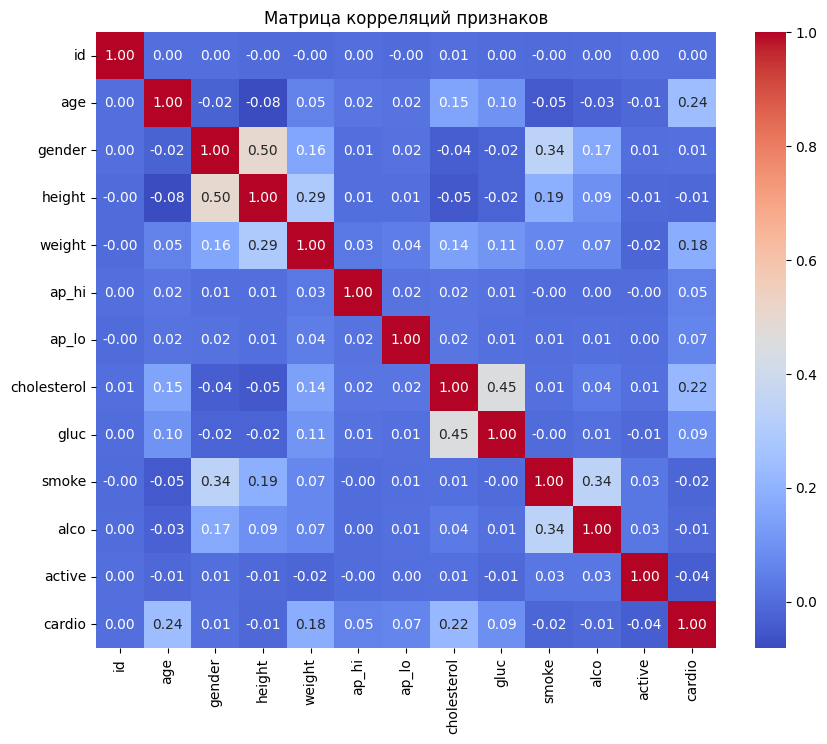

In [4]:
# Вычисление матрицы корреляций
correlation_matrix = data.corr()

# Вычисление ранга матрицы корреляций
rank = np.linalg.matrix_rank(correlation_matrix)

# Вычисление определителя матрицы корреляций
determinant = np.linalg.det(correlation_matrix)

# Вывод результатов
print(f"Ранг матрицы корреляций: {rank}")
print(f"Определитель матрицы корреляций: {determinant}")

# Визуализация матрицы корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляций признаков')
plt.show()

Из представленной матрицы корреляций можно сделать несколько выводов:

1. **Слабая корреляция большинства признаков**: 
   - Ранг матрицы корреляций равен 13, что соответствует числу признаков, и говорит о том, что каждый из признаков линейно независим.
Определитель матрицы корреляций равен 0.347, что не указывает на полную мультиколлинеарность, однако указывает на возможность наличия слабых корреляций между некоторыми признаками, как мы и видим в матрице корреляций.

2. **Взаимосвязь между полом и ростом**:
   - Корреляция между признаками `gender` и `height` составляет 0.50, что говорит о том, что пол (вероятно, мужчина/женщина) и рост имеют умеренную положительную корреляцию. Это логично, поскольку в среднем мужчины выше женщин.

3. **Корреляция между курением и употреблением алкоголя**:
   - Признаки `smoke` и `alco` имеют положительную корреляцию 0.34. Это может свидетельствовать о том, что курение и употребление алкоголя могут быть связаны между собой в образе жизни пациентов.

4. **Возраст и сердечно-сосудистые заболевания**:
   - Корреляция между возрастом (`age`) и наличием сердечно-сосудистых заболеваний (`cardio`) составляет 0.24. Это относительно слабая положительная корреляция, но она подтверждает то, что с возрастом риск сердечно-сосудистых заболеваний увеличивается.

5. **Холестерин и сердечно-сосудистые заболевания**:
   - Признаки `cholesterol` и `cardio` имеют корреляцию 0.22, что также ожидаемо, так как высокий уровень холестерина является фактором риска для сердечно-сосудистых заболеваний.

6. **Глюкоза и холестерин**:
   - Между уровнем глюкозы (`gluc`) и холестерина (`cholesterol`) наблюдается умеренная положительная корреляция (0.45). Это может указывать на связь между нарушениями метаболизма сахара и жиров.

7. **Корреляция между курением и употреблением алкоголя**:
   - Между признаками `smoke` и `gender` положительная корреляция 0.34, что скорее всего говорит о том, что между ними есть связь, которая скорее всего выражается в том, что мужчины курят больше женщин.

### Общий вывод:
Большинство признаков демонстрируют слабую взаимосвязь между собой, что указывает на отсутствие сильной линейной зависимости. Однако существует несколько пар признаков с умеренной корреляцией (например, рост и пол, давление), что может быть учтено при дальнейшем анализе данных.

## Задание 3. Стандартизация (15 баллов)

Разделите данные на два массива: в переменную **Х** запишите массив признаков, а в переменную **y** - целевую переменную (cardio). Стандартизируйте массив признаков без использования готовых функций для стандартизации.

In [5]:
# Создаём копию ДС
data_copy = data.copy()
# Переводим признак возраста в годы
data_copy['age_years'] = round((data_copy['age']/365.25),0)
# Удаляем лишние столбцы
data_copy = data_copy.drop(columns=['age','id'])

display(data_copy)

# Разделение данных на признаки (X) и целевую переменную (y)
X = data_copy.drop(columns=['cardio'])
y = data_copy['cardio']

# Стандартизация признаков без использования готовых функций
# Рассчитаем среднее и стандартное отклонение для каждого признака
X_mean = X.mean()
X_std = X.std()

# Применим стандартизацию
X_standardized = (X - X_mean) / X_std

display(X_standardized)


,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,2,168,62.0,110,80,1,1,0,0,1,0,50.0
1,1,156,85.0,140,90,3,1,0,0,1,1,55.0
2,1,165,64.0,130,70,3,1,0,0,0,1,52.0
3,2,169,82.0,150,100,1,1,0,0,1,1,48.0
4,1,156,56.0,100,60,1,1,0,0,0,0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2,168,76.0,120,80,1,1,1,0,1,0,53.0
69996,1,158,126.0,140,90,2,2,0,0,1,1,62.0
69997,2,183,105.0,180,90,3,1,0,1,0,1,52.0
69998,1,163,72.0,135,80,1,2,0,0,0,1,61.0


,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years
0,1.364045,0.443449,-0.847867,-0.122181,-0.088238,-0.539318,-0.395717,-0.310877,-0.238383,0.494164,-0.488620
1,-0.733103,-1.018161,0.749826,0.072610,-0.035180,2.400776,-0.395717,-0.310877,-0.238383,0.494164,0.251006
2,-0.733103,0.078046,-0.708937,0.007679,-0.141296,2.400776,-0.395717,-0.310877,-0.238383,-2.023592,-0.192770
3,1.364045,0.565250,0.541431,0.137540,0.017878,-0.539318,-0.395717,-0.310877,-0.238383,0.494164,-0.784471
4,-0.733103,-1.018161,-1.264657,-0.187111,-0.194354,-0.539318,-0.395717,-0.310877,-0.238383,-2.023592,-0.784471
...,...,...,...,...,...,...,...,...,...,...,...
69995,1.364045,0.443449,0.124642,-0.057251,-0.088238,-0.539318,-0.395717,3.216661,-0.238383,0.494164,-0.044845
69996,-0.733103,-0.774559,3.597887,0.072610,-0.035180,0.930729,1.351709,-0.310877,-0.238383,0.494164,1.286483
69997,1.364045,2.270461,2.139124,0.332331,-0.035180,2.400776,-0.395717,-0.310877,4.194876,-2.023592,-0.192770
69998,-0.733103,-0.165555,-0.153218,0.040145,-0.088238,-0.539318,1.351709,-0.310877,-0.238383,-2.023592,1.138557


Вычислите длину всех векторов - признаков. Прокомментируйте результат.

In [6]:
# Вычисляем длинну векторов
vector_lengths = np.sqrt((X_standardized ** 2).sum(axis=0))
print(vector_lengths)

gender         264.573241
height         264.573241
weight         264.573241
ap_hi          264.573241
ap_lo          264.573241
cholesterol    264.573241
gluc           264.573241
smoke          264.573241
alco           264.573241
active         264.573241
age_years      264.573241
dtype: float64


In [7]:
# Все векторы признаков имеют одинаковую длину, равную 264.57. 
# Это ожидаемый результат, так как данные были стандартизированы.

## Задание 4. Решение задачи классификации. (20 баллов)

**4.1** Теперь приступим непосредственно к решению задачи классификации. Обучите наивный байесовский классификатор. Предварительно выберите один из его видов: поясните свой выбор.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.3, random_state=42)

# Обучение классификатора
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [9]:
# В вашем наборе данных большинство признаков, такие как возраст, рост, вес, артериальное давление,
# являются непрерывными величинами, что подразумевает использование Гауссовского классификатора.

**4.2** Оцените полученное качество и проинтерпретируйте полученный результат. Не забудьте разделить выборку на обучающую и тестовую части.

In [10]:
# Предсказание на тестовых данных
y_pred = gnb.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.5944285714285714


In [11]:
# Точность наивного байесовского классификатора на составила 59,4%. Что нас не совсем устраивает.

## Задание 5: Решающее дерево (25 баллов)

Теперь решите задачу классификации с помощью обучающего дерева.

**5.1** Обучите дерево, не задавая никакие гиперпараметры. Выведите получившиеся гиперпараметры. Какое получилось качество? Сравните результат с предыдущей моделью.

In [12]:
from sklearn.tree import DecisionTreeClassifier

# Инициализация модели дерева решений
tree = DecisionTreeClassifier(random_state=42)

# Обучение модели
tree.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_tree = tree.predict(X_test)

# Оценка точности
tree_accuracy = accuracy_score(y_test, y_pred_tree)
print(tree_accuracy)

# Получение гиперпараметров обученного дерева решений
tree_params = tree.get_params()
print(tree_params)

0.6329523809523809
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


In [13]:
# Точность на тестовой выборке 63,3%, что выше, чем у наивного байесовского классификатора (59,4%).

**5.2** Подберите оптимальные гиперпараметры с помощью перебора по сетке. Обучите дерево с оптимальными гиперпараметрами. Изменилось ли качество?

In [14]:
from sklearn.model_selection import GridSearchCV

# Сетка гиперпараметров для поиска
param_grid_tree = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4] ,
    'criterion': ['gini', 'entropy']
}

# Настройка гиперпараметров с помощью GridSearchCV
grid_search_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree, cv=5)
grid_search_tree.fit(X_train, y_train)

# Предсказание на тестовых данных с оптимальными гиперпараметрами
y_pred_tree_optimized = grid_search_tree.predict(X_test)

# Оценка точности модели с оптимальными гиперпараметрами
tree_accuracy_optimized = accuracy_score(y_test, y_pred_tree_optimized)

# Вывод результатов
print(tree_accuracy_optimized)

0.7343809523809524


In [15]:
# Точность после подбора гиперпараметров: 73,4%, что выше, чем базовая точность дерева решений (63,3%)
# и точность наивного байесовского классификатора (59,4%).

**5.3** Выведите важность признаков. Какие три признака самые важные? Прокомментируйте результат.

In [16]:
# Получим важность признаков из оптимальной модели дерева решений
importances = grid_search_tree.best_estimator_.feature_importances_

# Создадим DataFrame для наглядного отображения важности признаков
feature_importances = pd.DataFrame({
    'Feature': X_standardized.columns,
    'Importance': importances
})

# Отсортируем признаки по важности
feature_importances_sorted = feature_importances.sort_values(by='Importance', ascending=False)

# Выводим топ-3 самых важных признака
print(feature_importances_sorted.head(3))



        Feature  Importance
3         ap_hi    0.766873
10    age_years    0.131916
5   cholesterol    0.081937


Три самых важных признака для модели дерева решений, согласно результатам, следующие:

ap_hi (систолическое артериальное давление) — 76.7%
age (возраст) — 13.2%
cholesterol (уровень холестерина) — 8.2%

Полученные данные соответсвуют медицинскому подходу и вполне объяснимы.

## Задание 6: Случайный лес и градиентный бустинг (20 баллов)

Осталось применить ансамблевые методы!

**6.1** Используйте случайный лес: без настройки и с подробом гиперпараметров по сетке. Какое качество получается в ситуации оптимальных гиперпараметров? Какие признаки самые важные? Сравнение результат с простым решающим деревом.

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Инициализация модели случайного леса без настройки гиперпараметров
rf_model = RandomForestClassifier(random_state=42)

# Обучение модели случайного леса
rf_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_rf = rf_model.predict(X_test)

# Оценка точности модели случайного леса без настройки гиперпараметров
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy без настройки {rf_accuracy}')

# Сетка гиперпараметров для случайного леса
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

# Настройка гиперпараметров для случайного леса с помощью GridSearchCV
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3)
grid_search_rf.fit(X_train, y_train)

# Предсказание на тестовой выборке с оптимальными гиперпараметрами
y_pred_rf_optimized = grid_search_rf.predict(X_test)

# Оценка точности модели с оптимальными гиперпараметрами
rf_accuracy_optimized = accuracy_score(y_test, y_pred_rf_optimized)
print(f'Accuracy с настройкой {rf_accuracy_optimized}')

# Получение важности признаков из оптимальной модели
rf_importances = grid_search_rf.best_estimator_.feature_importances_

# Создадим DataFrame для наглядного отображения важности признаков
feature_importances_rf = pd.DataFrame({
    'Feature': X_standardized.columns,
    'Importance': rf_importances
})

# Отсортируем признаки по важности
feature_importances_rf_sorted = feature_importances_rf.sort_values(by='Importance', ascending=False)

# Выводим топ-3 самых важных признака
print(feature_importances_rf_sorted.head(3))

Accuracy без настройки 0.7067142857142857
Accuracy с настройкой 0.7373809523809524
      Feature  Importance
3       ap_hi    0.475974
4       ap_lo    0.165364
10  age_years    0.132376


In [18]:
# Точность модели Случайного леса с подбором гиперпараметров (73.7%) незначительно превышает модель Обучающего дерева с подбором гиперпараметров (73.4%).

**6.2** Аналогичные операции реализуйте для градиентного бустинга. Попробуйте хотя бы две разных реализации градиентного бустинга. Сравните итоговое качество со случайным деревом.

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Сетка гиперпараметров для GradientBoostingClassifier
param_grid_gbc = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Инициализация модели
gbc = GradientBoostingClassifier(random_state=42)

# Настройка гиперпараметров с помощью GridSearchCV
grid_search_gbc = GridSearchCV(gbc, param_grid_gbc, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_gbc.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_gbc = grid_search_gbc.predict(X_test)

# Оценка точности модели
gbc_accuracy = accuracy_score(y_test, y_pred_gbc)

# Вывод точности
print(f"Точность GradientBoostingClassifier: {gbc_accuracy}")

# Получение важности признаков из оптимальной модели GradientBoostingClassifier
gbc_importances = grid_search_gbc.best_estimator_.feature_importances_

# Создадим DataFrame для наглядного отображения важности признаков для GradientBoostingClassifier
feature_importances_gbc = pd.DataFrame({
    'Feature': X_train.columns,  # замените X_train.columns на названия ваших признаков
    'Importance': gbc_importances
})

# Отсортируем признаки по важности для GradientBoostingClassifier
feature_importances_gbc_sorted = feature_importances_gbc.sort_values(by='Importance', ascending=False)

# Выводим топ-3 самых важных признаков для GradientBoostingClassifier
print("Топ-3 важных признаков для GradientBoostingClassifier:")
print(feature_importances_gbc_sorted.head(3))


# Инициализация новой модели
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Настройка гиперпараметров с помощью GridSearchCV
grid_search_xgb = GridSearchCV(xgb_model, param_grid_gbc, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_xgb = grid_search_xgb.predict(X_test)

# Оценка точности модели
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

# Вывод точности
print(f"Точность XGBoost: {xgb_accuracy}")

# Получение важности признаков из оптимальной модели XGBoost
xgb_importances = grid_search_xgb.best_estimator_.feature_importances_

# Создадим DataFrame для наглядного отображения важности признаков для XGBoost
feature_importances_xgb = pd.DataFrame({
    'Feature': X_train.columns,  # замените X_train.columns на названия ваших признаков
    'Importance': xgb_importances
})

# Отсортируем признаки по важности для XGBoost
feature_importances_xgb_sorted = feature_importances_xgb.sort_values(by='Importance', ascending=False)

# Выводим топ-3 самых важных признаков для XGBoost
print("Топ-3 важных признаков для XGBoost:")
print(feature_importances_xgb_sorted.head(3))


Точность GradientBoostingClassifier: 0.7379523809523809
Топ-3 важных признаков для GradientBoostingClassifier:
        Feature  Importance
3         ap_hi    0.723736
10    age_years    0.125286
5   cholesterol    0.078625


C:\Users\ARTEM\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [17:31:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Точность XGBoost: 0.7396666666666667
Топ-3 важных признаков для XGBoost:
        Feature  Importance
3         ap_hi    0.495674
5   cholesterol    0.186388
10    age_years    0.122859


In [21]:
# Модели GradientBoostingClassifier и XGBoost с подобранными параметрами показывают примерно одинаковые результаты точности: 73.8% и 74% соответственно.
# Все модели (Обучающее дерево, Случайный лес, разные реализации ГБ) показывают примерно одинаковую точность предсказания с учётом подбора гиперпараметров.
# От модели к моделе меняются наиболее важные признаки.